<a href="https://colab.research.google.com/github/kf-rahman/UW-stat_courses/blob/main/stat443_a3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# List of required packages
required_packages <- c("forecast", "ggplot2")

# Function to check and install required packages
install_if_missing <- function(packages) {
  for (package in packages) {
    if (!require(package, character.only = TRUE)) {
      install.packages(package, dependencies = TRUE)
      library(package, character.only = TRUE)
    }
  }
}

# Install missing packages
install_if_missing(required_packages)



### Simulation Problem





### 1 a)

[1] "MSE AR1: 0.0198967160335313"
[1] "MSE MA1: 1.70245350040395"
[1] "MSE ARMA11: 1.70245350040395"


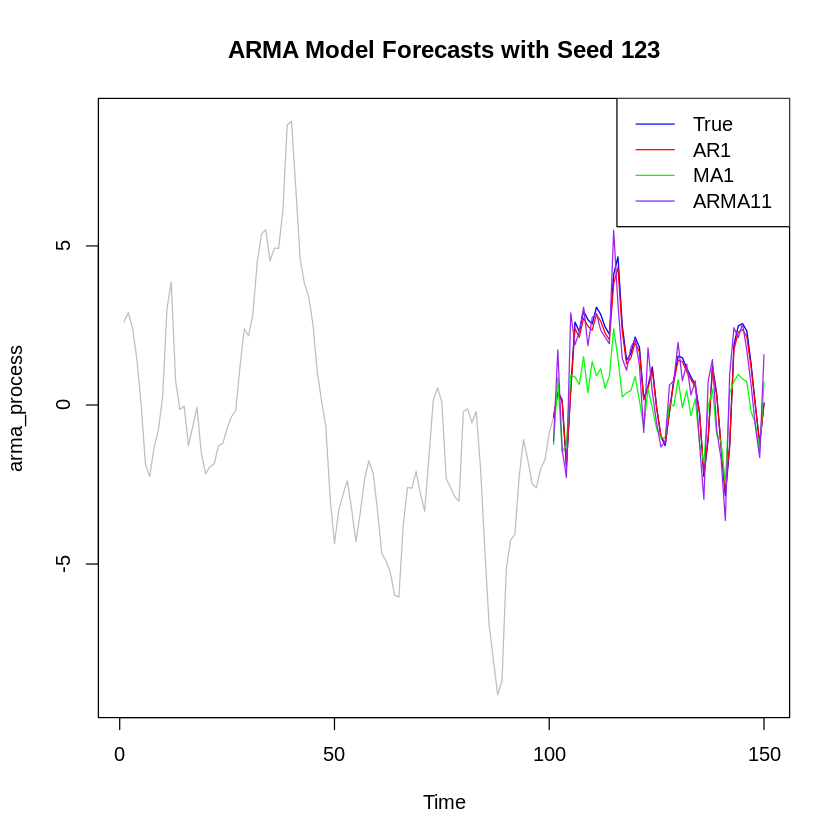

In [3]:
# Function to simulate and forecast using ARMA models
perform_analysis <- function(seed) {
  set.seed(seed)

  # Simulate ARMA(1,1) process
  phi <- 0.9
  theta <- 0.8
  n <- 150
  arma_process <- arima.sim(n = n, model = list(ar = phi, ma = theta))

  data_train <- arma_process[1:100]
  ar1_model <- Arima(data_train, order = c(1, 0, 0))
  ma1_model <- Arima(data_train, order = c(0, 0, 1))
  arma11_model <- Arima(data_train, order = c(1, 0, 1))

  predictions <- data.frame(Time = 101:150, AR1 = NA, MA1 = NA, ARMA11 = NA,
  True = arma_process[101:150])

  for (t in 101:150) {
    data_subset <- arma_process[1:t]

    updated_ar1 <- Arima(data_subset, model = ar1_model)
    updated_ma1 <- Arima(data_subset, model = ma1_model)
    updated_arma11 <- Arima(data_subset, model = arma11_model)

    predictions$AR1[t - 100] <- forecast(updated_ar1, h = 1)$mean
    predictions$MA1[t - 100] <- forecast(updated_ma1, h = 1)$mean
    predictions$ARMA11[t - 100] <- forecast(updated_arma11, h = 1)$mean
  }

  # Predictions
  AR1_pred<-predictions$AR1
  pred_True<-predictions$True
  MA1_pred<-predictions$MA1
  ARMA11_pred<-predictions$MA1



  # Calculate mean squared errors
  mse_ar1 <- mean((AR1_pred - pred_True)^2)
  mse_ma1 <- mean((MA1_pred - pred_True)^2)
  mse_arma11 <- mean((ARMA11_pred- pred_True)^2)

  print(paste("MSE AR1:", mse_ar1))
  print(paste("MSE MA1:", mse_ma1))
  print(paste("MSE ARMA11:", mse_arma11))

  plot(arma_process, type = "l", col = "grey", ylim = range(arma_process,
  predictions[,2:5]), main = paste("ARMA Model Forecasts with Seed", seed))
  lines(101:150, predictions$True, col = "blue")
  lines(101:150, predictions$AR1, col = "red")

  lines(101:150, predictions$MA1, col = "green")
  lines(101:150, predictions$ARMA11, col = "purple")
  legend("topright", legend = c("True", "AR1", "MA1", "ARMA11"),
  col = c("blue", "red", "green", "purple"), lty = 1)
}

perform_analysis(123)




### 1 b)

[1] "MSE AR1: 0.145798304963851"
[1] "MSE MA1: 4.31827021428011"
[1] "MSE ARMA11: 4.31827021428011"


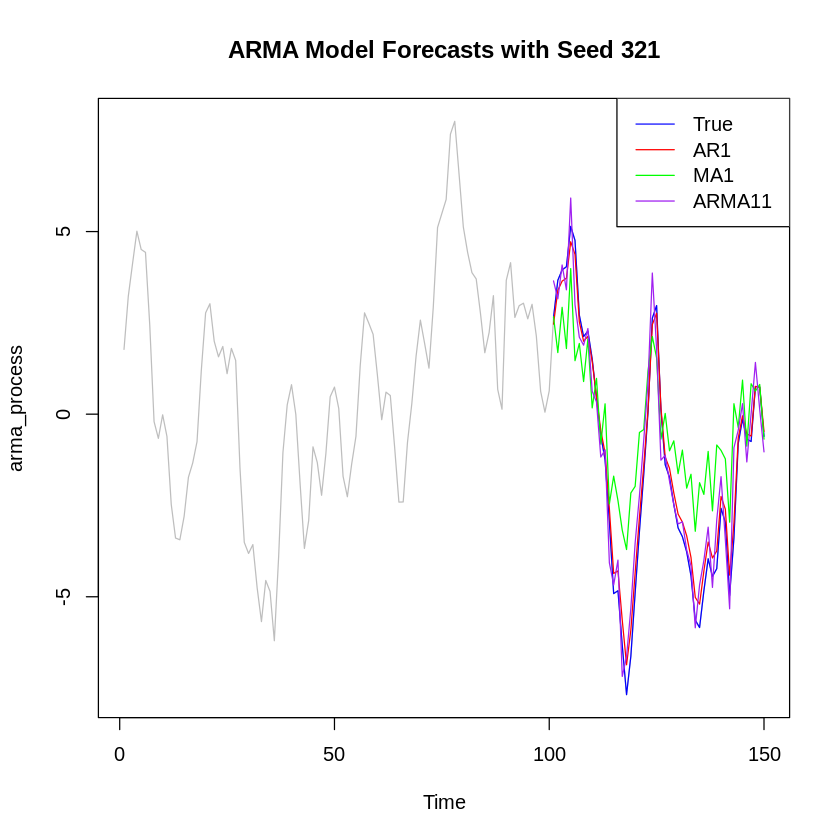

In [4]:

# Perform analysis with a different seed, e.g., 321
perform_analysis(321)

### Discussion

The AR(1) model performs significantly better than MA(1) and ARMA(1,1) models across both seeds in terms of MSE. Both models exhibit higher MSEs compared to the AR(1) model. From the plots, it is evident that the AR(1) model follows the true series more closely than the other models, aligning with the numerical MSE findings. The plots show that MA(1) and ARMA(1,1) diverge more significantly from the true values, particularly in later time points.

### Application Problem